In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [2]:
## Reading the data
data = pd.read_csv('/content/hypothyroid.csv')

In [3]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
data.shape

(3772, 30)

In [5]:
n = len(data[data['binaryClass'] == 'P'])
print("No of hypothyroid in Dataset:",n)

n1 = len(data[data['binaryClass'] == 'N'])
print("No of Normal in Dataset:",n1)

No of hypothyroid in Dataset: 3481
No of Normal in Dataset: 291


In [6]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [7]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

There are no missing values in dataset but if we see the dataset then tere are invalid values like '?'. So, replacing such values with nan.

In [8]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


In [9]:
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [10]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

age 0
sex 0
on thyroxine 0
query on thyroxine 0
on antithyroid medication 0
sick 0
pregnant 0
thyroid surgery 0
I131 treatment 0
query hypothyroid 0
query hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH measured 0
TSH 0
T3 measured 0
T3 0
TT4 measured 0
TT4 0
T4U measured 0
T4U 0
FTI measured 0
FTI 0
TBG measured 0
TBG 0
referral source 0
binaryClass 0


In [11]:
data=data.drop(['on thyroxine', 'query on thyroxine',
       'on antithyroid medication',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
        'TSH measured','hypopituitary','psych',
       'T3 measured',  'TT4 measured', 'T4U measured',
       'FTI measured', 'TBG measured', 'TBG', 'referral source',],axis=1)

In [12]:
for column in data.columns:
    print(column,(data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex ['F' 'M' nan]
sick ['f' 't']
pregnant ['f' 't']
thyroid surgery ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [13]:
data.dtypes

age                object
sex                object
sick               object
pregnant           object
thyroid surgery    object
goitre             object
tumor              object
TSH                object
T3                 object
TT4                object
T4U                object
FTI                object
binaryClass        object
dtype: object

In [14]:
data.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
binaryClass          0
dtype: int64

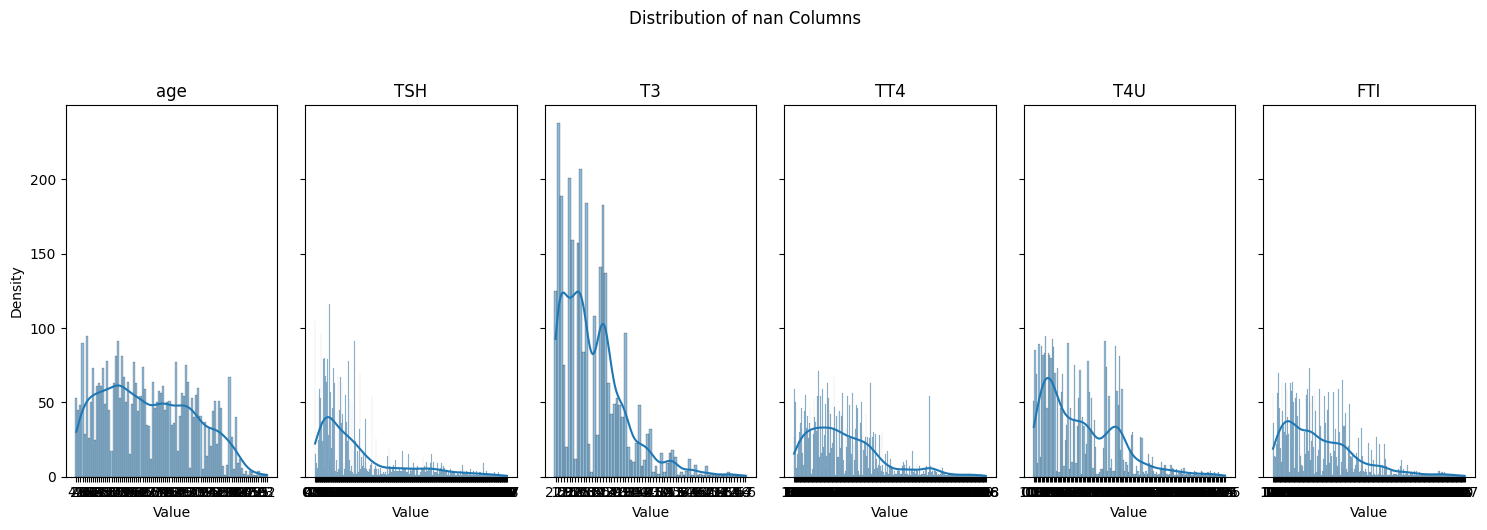

In [15]:
columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5), sharey=True)

for ax, column in zip(axes, columns):
    sns.histplot(data[column], ax=ax, kde=True)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

plt.suptitle('Distribution of nan Columns', y=1.05)
plt.tight_layout()
plt.show()

In [16]:
data['age'].fillna((data['age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

Handling nominal categorical variables

In [17]:
sex = data[["sex"]]
sex = pd.get_dummies(sex, drop_first= True)

In [18]:
sick = data[["sick"]]
sick = pd.get_dummies(sick, drop_first= True)

In [19]:
pregnant = data[["pregnant"]]
pregnant = pd.get_dummies(pregnant, drop_first= True)

In [20]:
thyroid_surgery = data[["thyroid surgery"]]
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)

In [21]:
goitre = data[["goitre"]]
goitre = pd.get_dummies(goitre, drop_first= True)

In [22]:
tumor = data[["tumor"]]
tumor = pd.get_dummies(tumor, drop_first= True)

In [23]:
data.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid surgery', 'goitre', 'tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'binaryClass'],
      dtype='object')

In [24]:
final_df = pd.concat([data,sex, sick, pregnant, thyroid_surgery,
       goitre, tumor,], axis = 1)

In [25]:
final_df.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid surgery', 'goitre', 'tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'binaryClass', 'sex_M', 'sick_t',
       'pregnant_t', 'thyroid surgery_t', 'goitre_t', 'tumor_t'],
      dtype='object')

In [26]:
final_df.drop(['sex', 'sick', 'pregnant', 'thyroid surgery',
       'goitre', 'tumor'], axis = 1, inplace = True)

In [27]:
final_df.isnull().sum()

age                  0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
binaryClass          0
sex_M                0
sick_t               0
pregnant_t           0
thyroid surgery_t    0
goitre_t             0
tumor_t              0
dtype: int64

<ipython-input-28-6bfeafffb4f0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column])
<ipython-input-28-6bfeafffb4f0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column])
<ipython-input-28-6bfeafffb4f0>:8: UserWarning: 

`distplot` is a deprecated function and will be 

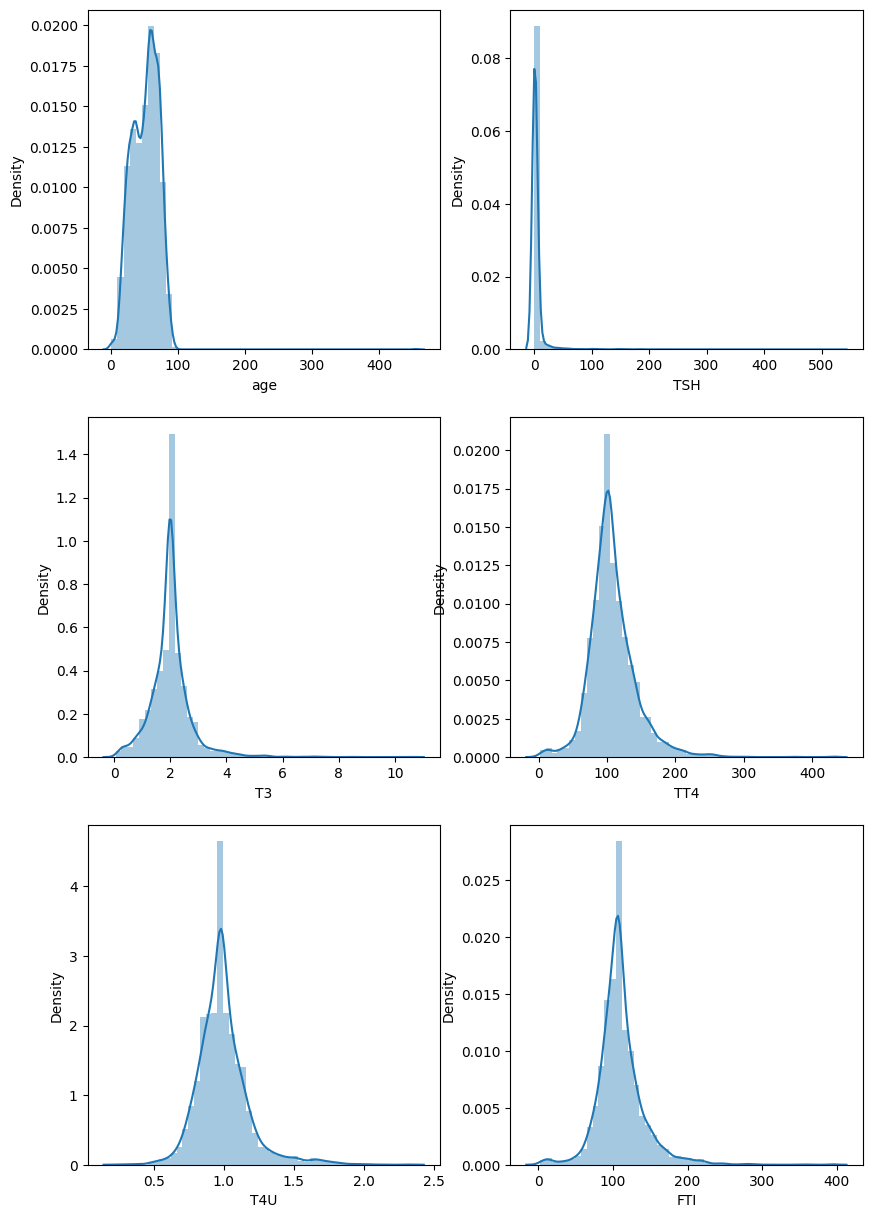

In [28]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(final_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Graph TSH is heavily skewed towards left so we drop it.

In [29]:
final_df = final_df.drop(['TSH'], axis = 1)

In [30]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
final_df['binaryClass']=lblEn.fit_transform(final_df['binaryClass'])

In [31]:
final_df['binaryClass'].unique()

array([1, 0])

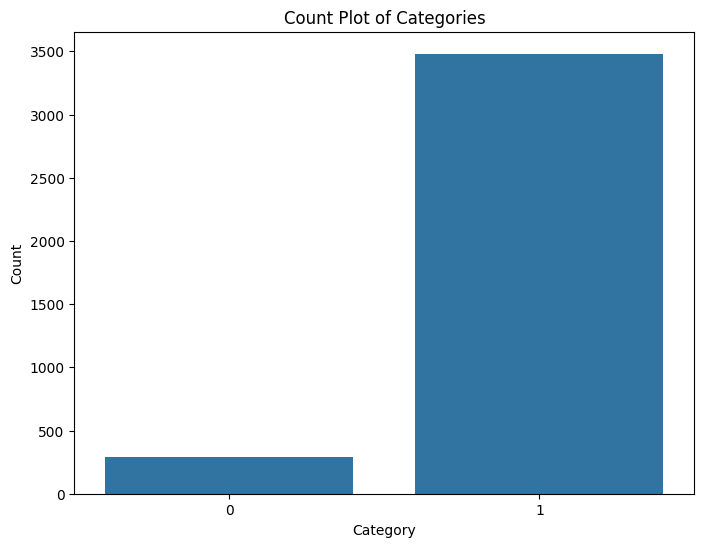

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=final_df, x='binaryClass')
plt.title('Count Plot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [33]:
X=final_df.drop(['binaryClass'],axis=1)
y=final_df.binaryClass

In [61]:
X_d=final_df.drop(['binaryClass'],axis=1)
y_d=final_df.binaryClass

Change Dimensions to 3D

In [34]:
final_df.head()

,age,T3,TT4,T4U,FTI,binaryClass,sex_M,sick_t,pregnant_t,thyroid surgery_t,goitre_t,tumor_t
0,41,2.5,125,1.14,109,1,0,0,0,0,0,0
1,23,2,102,0.98,107.0,1,0,0,0,0,0,0
2,46,2.0,109,0.91,120,1,1,0,0,0,0,0
3,70,1.9,175,0.98,107.0,1,0,0,0,0,0,0
4,70,1.2,61,0.87,70,1,0,0,0,0,0,0


In [35]:
df_3d = final_df[['age', 'T3', 'TT4', 'T4U', 'FTI', 'sex_M', 'sick_t', 'pregnant_t', 'thyroid surgery_t', 'goitre_t', 'tumor_t', 'binaryClass']]

In [36]:
df_3d.head()

,age,T3,TT4,T4U,FTI,sex_M,sick_t,pregnant_t,thyroid surgery_t,goitre_t,tumor_t,binaryClass
0,41,2.5,125,1.14,109,0,0,0,0,0,0,1
1,23,2,102,0.98,107.0,0,0,0,0,0,0,1
2,46,2.0,109,0.91,120,1,0,0,0,0,0,1
3,70,1.9,175,0.98,107.0,0,0,0,0,0,0,1
4,70,1.2,61,0.87,70,0,0,0,0,0,0,1


In [37]:
x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, y = [], [], [], [], [], [], [], [], [], [], [], []

In [38]:
for i in range(0, df_3d.shape[0]-48) :
    x0.append(df_3d.iloc[i:i+48,0])
    x1.append(df_3d.iloc[i:i+48,1])
    x2.append(df_3d.iloc[i:i+48,2])
    x3.append(df_3d.iloc[i:i+48,3])
    x4.append(df_3d.iloc[i:i+48,4])
    x5.append(df_3d.iloc[i:i+48,5])
    x6.append(df_3d.iloc[i:i+48,6])
    x7.append(df_3d.iloc[i:i+48,7])
    x8.append(df_3d.iloc[i:i+48,8])
    x9.append(df_3d.iloc[i:i+48,9])
    x10.append(df_3d.iloc[i:i+48,10])
    y.append(df_3d.iloc[i+48,11])

In [39]:
x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, y = np.array(x0), np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6), np.array(x7), np.array(x8), np.array(x9), np.array(x10), np.array(y)

In [40]:
x = np.stack([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10], axis=2)

In [41]:
x.shape

(3724, 48, 11)

In [42]:
y.shape

(3724,)

In [43]:
y = np.reshape(y, (len(y),1))
y.shape

(3724, 1)

In [44]:
y = np.reshape(y, (len(y),1))
y.shape

(3724, 1)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [48]:
len(X_train), len(Y_train), len(X_test), len(Y_test),

(2606, 2606, 1118, 1118)

Simple LSTM(Long Short Term Memory)

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [51]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have your training and testing data prepared as X_train, y_train, X_test, y_test

# Convert NumPy arrays to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

# Create DataLoader for training and testing data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters
input_size = X_train.shape[2]  # Input size (number of features)
hidden_size = 50  # Number of units in the hidden state of the LSTM
num_layers = 2  # Number of LSTM layers
output_size = 1  # Output size (number of output features)

# Create an instance of the LSTM model
model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs.squeeze(), targets).item() * inputs.size(0)
test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([46, 1])) that is different to the input size (torch.Size([46])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Loss: 0.0970
Epoch [2/10], Loss: 0.0419
Epoch [3/10], Loss: 0.0611
Epoch [4/10], Loss: 0.0988
Epoch [5/10], Loss: 0.0439
Epoch [6/10], Loss: 0.0236
Epoch [7/10], Loss: 0.0416
Epoch [8/10], Loss: 0.0444
Epoch [9/10], Loss: 0.0794
Epoch [10/10], Loss: 0.0614
Test Loss: 0.0765


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([30, 1])) that is different to the input size (torch.Size([30])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [53]:
# Convert predictions to numpy array
predictions = (outputs.squeeze().cpu().numpy() > 0.5).astype(int)
targets = y_test_tensor.cpu().numpy().astype(int)

# Calculate accuracy
accuracy = (predictions == targets).mean()

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9186


In [54]:
def single_pred(single_input):
  single_input_tensor = torch.tensor(single_input, dtype=torch.float32).unsqueeze(0)  # Add a batch dimension

  # Set the model to evaluation mode
  model.eval()

  # Make predictions
  with torch.no_grad():
      output = model(single_input_tensor)

  # Convert the output to a numpy array
  prediction = output.squeeze().cpu().numpy()
  if prediction<0.5:
    prediction=0
  else:
    prediction=1

  print('Prediction:', prediction)

In [55]:
single_pred(np.array([[63,5.5,199,1.05,190,0,0,0,0,0,0]]))

Prediction: 0


GRU(Grated Recurrent Unit)

In [56]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters
input_size = X_train.shape[2]  # Input size (number of features)
hidden_size = 50  # Number of units in the hidden state of the GRU
num_layers = 2  # Number of GRU layers
output_size = 1  # Output size (number of output features)

# Create an instance of the GRU model
model_gru = GRUModel(input_size, hidden_size, num_layers, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model_gru.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model_gru(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
model_gru.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model_gru(inputs)
        test_loss += criterion(outputs.squeeze(), targets).item() * inputs.size(0)
test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}')

Epoch [1/10], Loss: 0.0872
Epoch [2/10], Loss: 0.0258
Epoch [3/10], Loss: 0.0796
Epoch [4/10], Loss: 0.0153
Epoch [5/10], Loss: 0.0977
Epoch [6/10], Loss: 0.1148
Epoch [7/10], Loss: 0.0976
Epoch [8/10], Loss: 0.0224
Epoch [9/10], Loss: 0.0977
Epoch [10/10], Loss: 0.0803
Test Loss: 0.0750


In [57]:
# Convert predictions to numpy array
predictions = (outputs.squeeze().cpu().numpy() > 0.5).astype(int)
targets = y_test_tensor.cpu().numpy().astype(int)

# Calculate accuracy
accuracy = (predictions == targets).mean()

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9186


In [58]:
def single_pred_gru(single_input):
  single_input_tensor = torch.tensor(single_input, dtype=torch.float32).unsqueeze(0)  # Add a batch dimension

  # Set the model to evaluation mode
  model_gru.eval()

  # Make predictions
  with torch.no_grad():
      output = model_gru(single_input_tensor)

  # Convert the output to a numpy array
  prediction = output.squeeze().cpu().numpy()
  if prediction<0.5:
    prediction=0
  else:
    prediction=1

  print('Prediction:', prediction)

In [59]:
single_pred_gru(np.array([[63,5.5,199,1.05,190,0,0,0,0,0,0]]))

Prediction: 0


Training KNN and Random Forest

In [62]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
X_sampled,y_sampled=rdsmple.fit_resample(X_d,y_d)

X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)

X_sampled.columns

Index(['age', 'T3', 'TT4', 'T4U', 'FTI', 'sex_M', 'sick_t', 'pregnant_t',
       'thyroid surgery_t', 'goitre_t', 'tumor_t'],
      dtype='object')

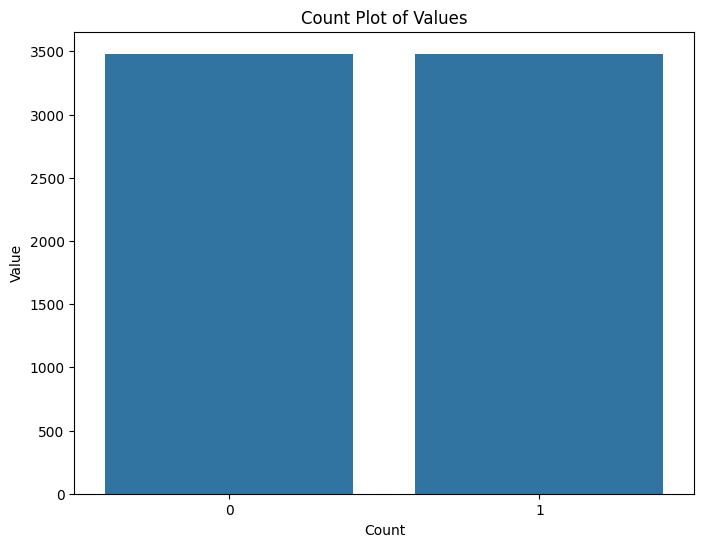

In [63]:
unique_values, counts = np.unique(y_sampled, return_counts=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=unique_values, y=counts)
plt.title('Count Plot of Values')
plt.xlabel('Count')
plt.ylabel('Value')
plt.show()

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=0)

In [65]:
def knn_classifier(X_train,X_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(X_train,y_train)
    y_pred=classifier_knn.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_knn.score(X_train,y_train)}\n Test Score:{classifier_knn.score(X_test,y_test)}')

In [66]:
def forest_classifier(X_train,X_test,y_train,y_test):
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    classifier_forest.fit(X_train,y_train)
    y_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_forest.score(X_train,y_train)}\n Test Score:{classifier_forest.score(X_test,y_test)}')

In [67]:
def print_score(X_train, X_test, y_train, y_test):
    print("KNN:\n")
    result2=knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)

    print("-"*100)
    print()

    print("Random Forest:\n")
    result5=forest_classifier(X_train, X_test, y_train, y_test)
    print(result5)

In [68]:
print_score(X_train, X_test, y_train, y_test)

KNN:

Train Score:0.9405638355180463
 Test Score:0.9117013639626705
----------------------------------------------------------------------------------------------------

Random Forest:

Train Score:0.9998204345483929
 Test Score:0.9885139985642498


In [69]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train,y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[708,   0],
       [ 13, 672]])

In [70]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       708
           1       1.00      0.98      0.99       685

    accuracy                           0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393



In [72]:
print(classifier_forest.predict([[83,2.0,148,1.11,134,0,0,0,0,0,0]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [73]:
print(classifier_forest.predict([[63,5.5,199,1.05,190,0,0,0,0,0,0]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
